In [1]:
#Primero se importan las librerías necesarias
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
#Se importan los datos del archivo .csv
bolsa = pd.read_csv(r"C:\Users\jap25\OneDrive\Documentos\git workspace\DataScienceCourseTasks\Task #2 - Exploratory data analysis\fundamentals.csv")
bolsa.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [15]:
#Se puede observar que todas sus columnas son de tipo decimal excepto por Period Ending, Ticker Symbol y la primera columna
#que a primera vista parece ser de índices, por ende, podremos prescindir de ella, ya que, la misma importación crea sus 
#índices
print(bolsa.dtypes)

Unnamed: 0                        int64
Ticker Symbol                    object
Period Ending                    object
Accounts Payable                float64
Accounts Receivable             float64
                                 ...   
Total Revenue                   float64
Treasury Stock                  float64
For Year                        float64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
Length: 79, dtype: object


In [16]:
#Procedemos a homologar y limpiar los nombres de las columnas
bolsa.columns = bolsa.columns.str.strip().str.lower().str.replace(' ', '_')
bolsa.drop('unnamed:_0', axis = 1, inplace= True)
bolsa['ticker_symbol'] = bolsa['ticker_symbol'].str.lower().str.strip()
bolsa['period_ending'] = pd.to_datetime(bolsa['period_ending'], format='%Y-%m-%d')

#Procedemos a homologar y limpiar los registros del dataframe
string_columns = list(bolsa.dtypes[bolsa.dtypes == 'object'].index)
for col in string_columns:
    bolsa[col] = bolsa[col].str.strip().str.lower().str.replace(' ', '_')
    
#Hacemos un vistazo previo al dataframe
bolsa

,ticker_symbol,period_ending,accounts_payable,accounts_receivable,add'l_income/expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_ratio,cash_and_cash_equivalents,...,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_&_equity,total_revenue,treasury_stock,for_year,earnings_per_share,estimated_shares_outstanding
0,aal,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,aal,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,aal,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,aal,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,aap,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,zion,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08
1777,zts,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08
1778,zts,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08
1779,zts,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,1.154000e+09,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08


In [19]:
"""En este punto podremos definir a que se refiere cada columna:
Ticker Symbol: Símbolo de Cotización
Period Ending: Fin del Período
Accounts Payable: Cuentas por Pagar
Accounts Receivable: Cuentas por Cobrar
Add'l income/expense items: Elementos Adicionales de Ingresos/Gastos
After Tax ROE: ROE después de Impuestos (Retorno sobre el Capital)
Capital Expenditures: Gastos de Capital
Capital Surplus: Superávit de Capital
Cash Ratio: Ratio de Liquidez
Cash and Cash Equivalents: Efectivo y Equivalentes de Efectivo
Changes in Inventories: Cambios en Inventarios
Common Stocks: Acciones Comunes
Cost of Revenue: Costo de Ingresos
Current Ratio: Ratio de Liquidez Corriente
Deferred Asset Charges: Cargos por Activos Diferidos
Deferred Liability Charges: Cargos por Pasivos Diferidos
Depreciation: Depreciación
Earnings Before Interest and Tax: Ganancias antes de Intereses e Impuestos
Earnings Before Tax: Ganancias antes de Impuestos
Effect of Exchange Rate: Efecto del Tipo de Cambio
Equity Earnings/Loss Unconsolidated Subsidiary: Ganancias/Pérdidas de Capital de Filial No Consolidada
Fixed Assets: Activos Fijos
Goodwill: Fondo de Comercio
Gross Margin: Margen Bruto
Gross Profit: Beneficio Bruto
Income Tax: Impuesto sobre la Renta
Intangible Assets: Activos Intangibles
Interest Expense: Gastos por Intereses
Inventory: Inventario
Investments: Inversiones
Liabilities: Pasivos
Long-Term Debt: Deuda a Largo Plazo
Long-Term Investments: Inversiones a Largo Plazo
Minority Interest: Interés Minoritario
Misc. Stocks: Acciones Diversas
Net Borrowings: Préstamos Netos
Net Cash Flow: Flujo de Caja Neto
Net Cash Flow-Operating: Flujo de Caja Neto de Operaciones
Net Cash Flows-Financing: Flujos de Caja Netos de Financiamiento
Net Cash Flows-Investing: Flujos de Caja Netos de Inversión
Net Income: Ingreso Neto
Net Income Adjustments: Ajustes al Ingreso Neto
Net Income Applicable to Common Shareholders: Ingreso Neto Aplicable a Accionistas Comunes
Net Income-Cont. Operations: Ingreso Neto de Operaciones Continuas
Net Receivables: Cuentas por Cobrar Netas
Non-Recurring Items: Elementos No Recurrentes
Operating Income: Ingreso Operativo
Operating Margin: Margen Operativo
Other Assets: Otros Activos
Other Current Assets: Otros Activos Corrientes
Other Current Liabilities: Otras Pasivos Corrientes
Other Equity: Otras Participaciones en el Capital
Other Financing Activities: Otras Actividades de Financiamiento
Other Investing Activities: Otras Actividades de Inversión
Other Liabilities: Otros Pasivos
Other Operating Activities: Otras Actividades Operativas
Other Operating Items: Otros Elementos Operativos
Pre-Tax Margin: Margen antes de Impuestos
Pre-Tax ROE: ROE antes de Impuestos
Profit Margin: Margen de Beneficio
Quick Ratio: Ratio de Prueba Ácida
Research and Development: Investigación y Desarrollo
Retained Earnings: Ganancias Retenidas
Sale and Purchase of Stock: Venta y Compra de Acciones
Sales, General and Admin.: Ventas, General y Administración
Short-Term Debt / Current Portion of Long-Term Debt: Deuda a Corto Plazo / Porción Corriente de la Deuda a Largo Plazo
Short-Term Investments: Inversiones a Corto Plazo
Total Assets: Activos Totales
Total Current Assets: Activos Corrientes Totales
Total Current Liabilities: Pasivos Corrientes Totales
Total Equity: Patrimonio Total
Total Liabilities: Pasivos Totales
Total Liabilities & Equity: Total de Pasivos y Patrimonio
Total Revenue: Ingresos Totales
Treasury Stock: Acciones de Tesorería
For Year: Para el Año
Earnings Per Share: Ganancias por Acción
Estimated Shares Outstanding: Acciones Estimadas en Circulación

E identificamos como variables objetivo:
* Earnings Per Share (Ganancias por Acción): Esta métrica es esencial para el análisis fundamental, ya que proporciona una 
indicación clara de la rentabilidad de una empresa. Sería útil para evaluar si las máquinas pueden predecir o mejorar el 
rendimiento de las acciones basándose en cambios en la rentabilidad.

* Total Revenue (Ingresos Totales): Una variable clave para el análisis fundamental, los ingresos totales pueden indicar la 
salud general y la tendencia de crecimiento de una empresa. Analizar cómo los ingresos afectan los precios de las acciones 
podría ser crucial para comprender si la negociación automatizada puede identificar oportunidades de inversión basadas en 
el crecimiento de ingresos.

* Net Income (Ingreso Neto): Representa las ganancias totales después de deducir gastos e impuestos. Esta variable es un 
indicador significativo del éxito financiero de una empresa y puede ser vital para entender cómo las máquinas interpretan 
y reaccionan a los cambios en la rentabilidad.

* After Tax ROE (ROE después de Impuestos): Esta métrica puede ayudar a evaluar la eficiencia con la que una empresa genera 
beneficios para los accionistas y cómo esto podría influir en las decisiones de negociación automatizada.

* Operating Margin (Margen Operativo): Importante para el análisis fundamental, el margen operativo ofrece una perspectiva 
sobre la eficiencia operativa de una empresa, que podría ser una métrica clave para la toma de decisiones automatizada.

"""
bolsa.head()

,ticker_symbol,period_ending,accounts_payable,accounts_receivable,add'l_income/expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_ratio,cash_and_cash_equivalents,...,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_&_equity,total_revenue,treasury_stock,for_year,earnings_per_share,estimated_shares_outstanding
0,aal,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,aal,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,aal,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,aal,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,aap,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [24]:
pd.set_option('display.max_rows', None)
bolsa.isnull().sum()

ticker_symbol                                            0
period_ending                                            0
accounts_payable                                         0
accounts_receivable                                      0
add'l_income/expense_items                               0
after_tax_roe                                            0
capital_expenditures                                     0
capital_surplus                                          0
cash_ratio                                             299
cash_and_cash_equivalents                                0
changes_in_inventories                                   0
common_stocks                                            0
cost_of_revenue                                          0
current_ratio                                          299
deferred_asset_charges                                   0
deferred_liability_charges                               0
depreciation                                            

KeyboardInterrupt: 

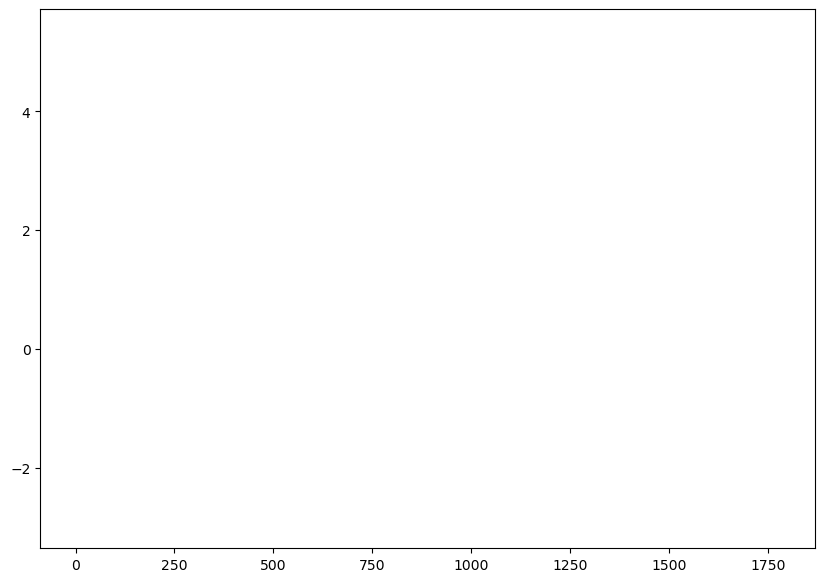

In [22]:
# Procedemos a graficar los históricos de cada variable objetivo
# Histograma de la primera variable objetivo

bolsa['period_ending'] = pd.to_datetime(bolsa['period_ending'], format='%Y-%m-%d')

# Pivotar el DataFrame para obtener un formato adecuado para el gráfico de barras apiladas
pivot_df = bolsa.pivot(columns='period_ending', values='earnings_per_share')

# Dibujar el gráfico de barras apiladas
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Añadir etiquetas y título
plt.xlabel('Empresa')
plt.ylabel('Earnings Per Share')
plt.title('Comparación de Earnings Per Share por Empresa a lo Largo de los Años')
plt.legend(title='Año')

# Mostrar el gráfico
plt.show()